In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
import string

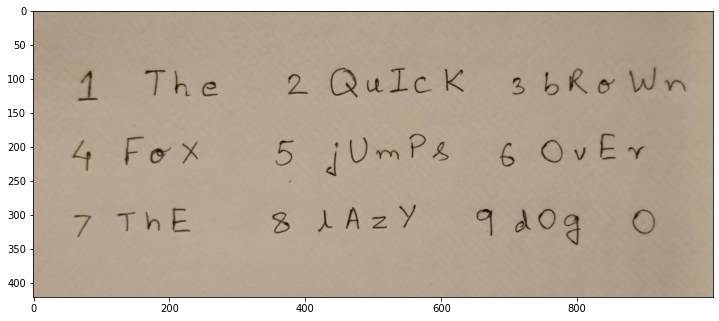

In [ ]:
# img = cv2.imread('/content/drive/MyDrive/image_segmentation_test.jpg')
# img = cv2.imread('/content/drive/MyDrive/image_segmentation_test2.jpg')
# img = cv2.imread('/content/drive/MyDrive/image_segmentation_test3.jpg')
# img = cv2.imread('/content/drive/MyDrive/image_segmentation_test4.jpg')
# img = cv2.imread('/content/drive/MyDrive/image_segmentation_test5.jpg')
img = cv2.imread('/content/drive/MyDrive/image_segmentation_test6.jpg')
# img = cv2.imread('/content/drive/MyDrive/letter.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w>1000:
  new_w = 1000
  new_h = int(1000*(h/w))

  img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(new_w/80.0,new_h/80.0))
plt.imshow(img)

In [ ]:
def thresholding_img(image):
  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
  plt.figure(figsize=(thresh.shape[1]/80.0,thresh.shape[0]/80.0))
  plt.imshow(thresh)
  return thresh

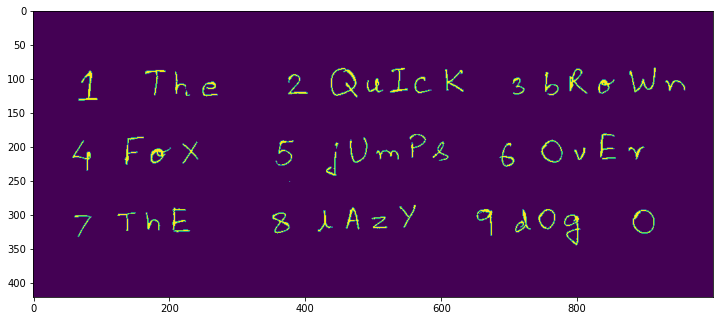

In [ ]:
thresh_img = thresholding_img(img)

In [ ]:
def noise_removal(image):
  kernel = np.ones((1,1), np.uint8)
  image = cv2.dilate(image, kernel, iterations=1)
  image = cv2.erode(image, kernel, iterations=1)
  image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
  image = cv2.GaussianBlur(image, (3,3), 0)
  plt.figure(figsize=(image.shape[1]/80.0,image.shape[0]/80.0))
  plt.imshow(image)
  return image

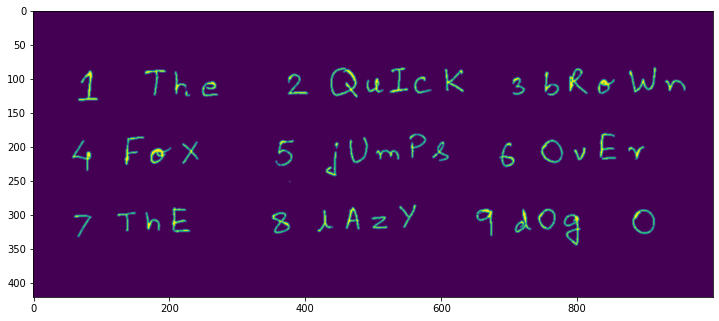

In [ ]:
nc_img = noise_removal(thresh_img)

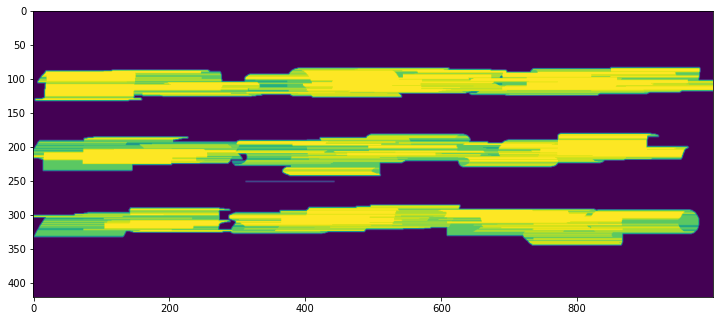

In [ ]:
ln_cont_img = nc_img.copy()

kernel = np.ones((1,130), np.uint8)
ln_cont_img = cv2.dilate(ln_cont_img, kernel, iterations=1)
plt.figure(figsize=(ln_cont_img.shape[1]/80.0,ln_cont_img.shape[0]/80.0))
plt.imshow(ln_cont_img)

In [ ]:
(contours, hierarchy) = cv2.findContours(ln_cont_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
line_contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])

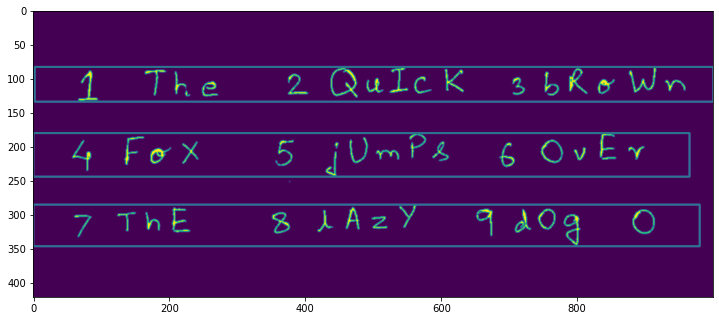

In [ ]:
img2 = nc_img.copy()

for l_cont in line_contours:
  if cv2.contourArea(l_cont)<1000:
      continue
  x, y, w, h = cv2.boundingRect(l_cont)
  cv2.rectangle(img2, (x,y), (x+w,y+h), (100,100,100), 2)

plt.figure(figsize=(img2.shape[1]/80.0,img2.shape[0]/80.0))
plt.imshow(img2)

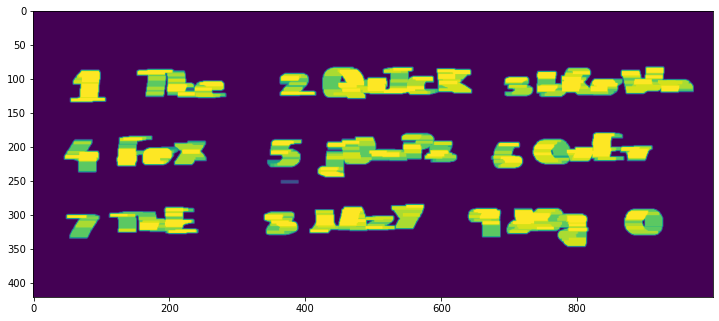

In [ ]:
wd_cont_img = nc_img.copy()

kernel = np.ones((4,25), np.uint8)
wd_cont_img = cv2.dilate(wd_cont_img, kernel, iterations=1)
plt.figure(figsize=(wd_cont_img.shape[1]/80.0,wd_cont_img.shape[0]/80.0))
plt.imshow(wd_cont_img)

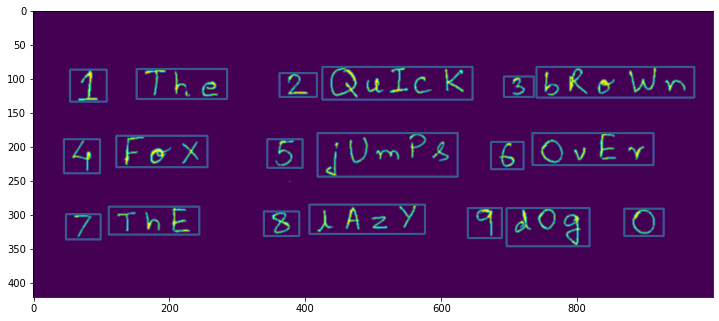

In [ ]:
img3 = nc_img.copy()

words_in_line = []

for line in line_contours:

  word_list = []

  x,y,w,h = cv2.boundingRect(line)
  roi_line = wd_cont_img[y:y+h, x:x+w]

  (word_contour, hierarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  word_contours = sorted(word_contour, key=lambda x: cv2.boundingRect(x)[0])

  for word in word_contours:

    if cv2.contourArea(word)<300:
      continue

    x2,y2,w2,h2 = cv2.boundingRect(word)
    roi_word = nc_img.copy()[(y+y2-2):(y+y2+h2+2), (x+x2-2):(x+x2+w2+2)]
    word_list.append(roi_word)
    cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (75, 75, 75), 2)

  words_in_line.append(word_list)

plt.figure(figsize=(img3.shape[1]/80.0,img3.shape[0]/80.0))
plt.imshow(img3)

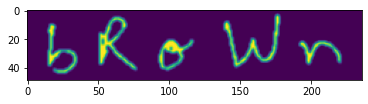

In [ ]:
zaz = words_in_line[0][5]
plt.imshow(zaz)

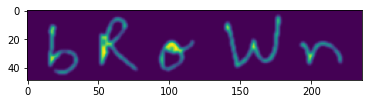

In [ ]:
zaz = words_in_line[0][5]
kernel = np.ones((2,2), np.uint8)
zaz = cv2.erode(zaz, kernel, iterations=1)
zaz = cv2.GaussianBlur(zaz, (3,3), 0)
plt.imshow(zaz)

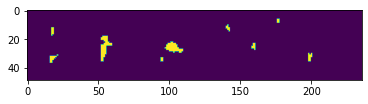

In [ ]:
rett, zaz = cv2.threshold(zaz, 150, 255, cv2.THRESH_BINARY)
plt.imshow(zaz)

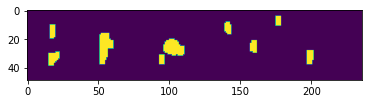

In [ ]:
kernel = np.ones((5,3), np.uint8)
zaz = cv2.dilate(zaz, kernel, iterations=1)
# zaz = cv2.GaussianBlur(zaz, (3,3), 0)
plt.imshow(zaz)

In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(2,2))

# model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(2,2))

# model.add(tf.keras.layers.Dropout(0.2))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(120, activation='relu'))
# model.add(tf.keras.layers.Dense(120, activation='relu'))
# model.add(tf.keras.layers.Dense(62, activation = 'softmax'))

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3,3)))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3)))
model.add(tf.keras.layers.BatchNormalization(axis=3))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(62, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.load_weights('/content/drive/MyDrive/character_reader.h5')

In [ ]:
label_mapper = {}

for i in range(62):
  if i<10:
    label_mapper[i] = i

  elif i>=10 and i<=35:
    label_mapper[i] = string.ascii_uppercase[i-10]

  elif i>35:
    label_mapper[i] = string.ascii_lowercase[i-36]

In [ ]:
def gets_word(pred, mapper):
  wrd = ''

  for ch in pred:
    k = np.argmax(ch)
    wrd+=str(mapper[k])

  return wrd

In [ ]:
full_text = ''
for i in range(len(words_in_line)):
  for j in range(len(words_in_line[i])):
    word = words_in_line[i][j]
    kernel = np.ones((7,1), np.uint8)
    char_split = cv2.dilate(word.copy(), kernel, iterations=1)
    # kernel_erode = np.ones((1,2), np.uint8)
    # char_split = cv2.erode(word.copy(), kernel_erode, iterations=1)
    # kernel_dilate = np.ones((10,1), np.uint8)
    # char_split = cv2.dilate(char_split, kernel_dilate, iterations=1)
    # char_split=word.copy()

    chars = []
    (char_contour, hierarchy) = cv2.findContours(char_split.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    char_contours = sorted(char_contour, key=lambda x: cv2.boundingRect(x)[0])

    for char in char_contours:
      x,y,w,h = cv2.boundingRect(char)
      ch = word.copy()[y:y+h+2, x-2:x+w+2]
      chars.append(ch)

    chars = [cv2.resize(x, (28,28)) for x in chars]
    chars = np.array(chars)

    chars = tf.keras.utils.normalize(chars, axis=1)
    chars = np.expand_dims(chars, axis=3)

    pred = model.predict([chars])

    decoded_word = gets_word(pred, label_mapper)
    full_text = full_text+decoded_word+' '
  full_text+='\n'

1/1 [==============================] - 0s 22ms/step


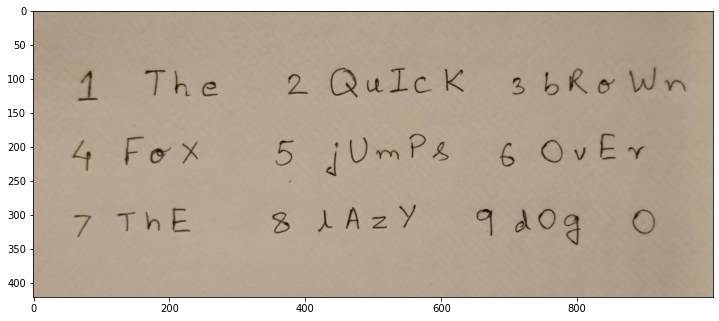

In [ ]:
plt.figure(figsize=(new_w/80.0,new_h/80.0))
plt.imshow(img)
plt.show()

In [ ]:
print(full_text)

1 The 2 QUICK 3 bR0Wn 
4 F0X 5 jUMP8 6 0vEr 

7 ThE 8 2AZY 9 20g 0 

